<a href="https://colab.research.google.com/github/jeffleon/Python_Google_Colab/blob/master/Advanced_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Advanced Pandas**


1.   Merge Data Frames
2.   Groupby
3.   Table Pivot
4.   AsType



In [0]:
import pandas as pd

##**Merge Data Frame**

In [0]:
df1 = pd.DataFrame({
      "City": ["New York", "Chicago", "Orlando","Baltimore"],
      "Temperature" :[21,14,35,50]
})
df1

,City,Temperature
0,New York,21
1,Chicago,14
2,Orlando,35
3,Baltimore,50


In [0]:
df2 = pd.DataFrame({
      "City": ["Chicago", "New York","San Francisco"],
      "Humidity" :[68,65,75]
})
df2

,City,Humidity
0,Chicago,68
1,New York,65
2,San Francisco,75


*when i do the merge or how i do the merge its for 
default en inner merge thats mean the merge its whith 
the intersection of the two sets*


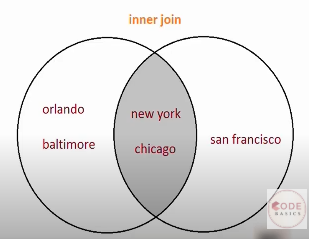

In [0]:
df3 = pd.merge(df1,df2,on='City', how='inner')
df3

,City,Temperature,Humidity
0,New York,21,65
1,Chicago,14,68


*When i merge the outer*

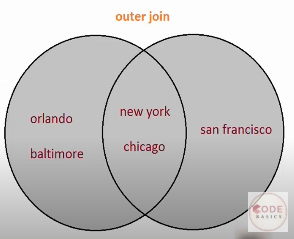

In [0]:
df3 = pd.merge(df1,df2,on = 'City', how = 'outer')
df3

,City,Temperature,Humidity
0,New York,21.0,65.0
1,Chicago,14.0,68.0
2,Orlando,35.0,NaN
3,Baltimore,50.0,NaN
4,San Francisco,NaN,75.0


*Merge Left*

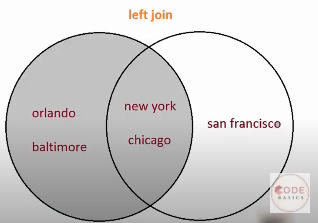

In [0]:
df3 = pd.merge(df1,df2,on = 'City', how = 'left')
df3

,City,Temperature,Humidity
0,New York,21,65.0
1,Chicago,14,68.0
2,Orlando,35,NaN
3,Baltimore,50,NaN


*Merge Right*

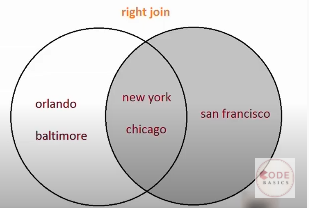

In [0]:
df3 = pd.merge(df1,df2,on = 'City', how = 'right')
df3

,City,Temperature,Humidity
0,New York,21.0,65
1,Chicago,14.0,68
2,San Francisco,NaN,75


*in this case we can wiew in that features are in the data frame*

In [0]:
df3 = pd.merge(df1,df2,on = 'City', how = 'outer', indicator=True)
df3

,City,Temperature,Humidity,_merge
0,New York,21.0,65.0,both
1,Chicago,14.0,68.0,both
2,Orlando,35.0,NaN,left_only
3,Baltimore,50.0,NaN,left_only
4,San Francisco,NaN,75.0,right_only


In [0]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35,38],
    "humidity": [65,68,71, 75]
})
df1

,city,temperature,humidity
0,new york,21,65
1,chicago,14,68
2,orlando,35,71
3,baltimore,38,75


In [0]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "temperature": [21,14,35],
    "humidity": [65,68,71]
})
df2

,city,temperature,humidity
0,chicago,21,65
1,new york,14,68
2,san diego,35,71


In [0]:
df3 = pd.merge(df1,df2,on = 'city', how = 'outer')
df3

,city,temperature_x,humidity_x,temperature_y,humidity_y
0,new york,21.0,65.0,14.0,68.0
1,chicago,14.0,68.0,21.0,65.0
2,orlando,35.0,71.0,NaN,NaN
3,baltimore,38.0,75.0,NaN,NaN
4,san diego,NaN,NaN,35.0,71.0


In [0]:
df3 = pd.merge(df1,df2,on = 'city', how = 'outer', suffixes =('_left', '_right'))
df3

,city,temperature_left,humidity_left,temperature_right,humidity_right
0,new york,21.0,65.0,14.0,68.0
1,chicago,14.0,68.0,21.0,65.0
2,orlando,35.0,71.0,NaN,NaN
3,baltimore,38.0,75.0,NaN,NaN
4,san diego,NaN,NaN,35.0,71.0


##**GroupBy**


In [0]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [0]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [0]:
drinks.beer_servings.mean()

106.16062176165804

In [0]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [0]:
drinks[drinks.continent == 'Africa'].beer_servings.mean()

61.471698113207545

In [0]:
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [0]:
drinks.groupby('continent').beer_servings.agg(['max', 'min', 'count', 'mean'])


,max,min,count,mean
continent,,,,
Africa,376,0,53,61.471698
Asia,247,0,44,37.045455
Europe,361,0,45,193.777778
North America,285,1,23,145.434783
Oceania,306,0,16,89.687500
South America,333,93,12,175.083333


In [0]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [0]:
%matplotlib inline

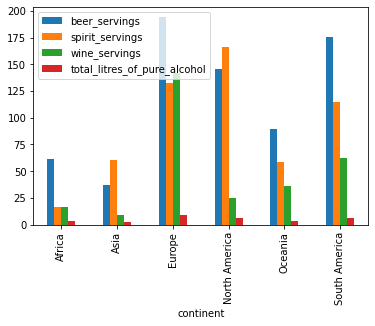

In [0]:
drinks.groupby('continent').mean().plot(kind= 'bar')

##**Pivot Table**

In [0]:
df = pd.DataFrame({"Date":["5/1/2017","5/2/2017","5/1/2017","5/1/2017","5/2/2017"],
                   "City":["new york","new york", "mumbai", "beijing", "beijing"],
                   "Temperature":[65,66,68,75,78],
                   "Humidity":[56,58,69,89,42]})
df

,Date,City,Temperature,Humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/1/2017,mumbai,68,69
3,5/1/2017,beijing,75,89
4,5/2/2017,beijing,78,42


In [0]:
df.pivot(index = "Date", columns = "City")

Temperature                 Humidity                
City         beijing mumbai new york  beijing mumbai new york
Date                                                         
5/1/2017        75.0   68.0     65.0     89.0   69.0     56.0
5/2/2017        78.0    NaN     66.0     42.0    NaN     58.0

In [0]:
df.pivot(index = "Date", columns = "City", values="Humidity")

City,beijing,mumbai,new york
Date,,,
5/1/2017,89.0,69.0,56.0
5/2/2017,42.0,NaN,58.0


In [0]:
df = pd.DataFrame({"Date":["5/1/2017","5/1/2017","5/2/2017","5/2/2017","5/1/2017","5/1/2017","5/2/2017","5/2/2017"],
                   "City":["new york","new york","new york","new york","beijing", "beijing","beijing", "beijing"],
                   "Temperature":[65,66,75,78,65,66,75,78],
                   "Humidity":[56,58,89,42,56,58,89,42]})
df

,Date,City,Temperature,Humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,66,58
2,5/2/2017,new york,75,89
3,5/2/2017,new york,78,42
4,5/1/2017,beijing,65,56
5,5/1/2017,beijing,66,58
6,5/2/2017,beijing,75,89
7,5/2/2017,beijing,78,42


In [0]:
df.pivot_table(index="City",columns="Date", aggfunc="mean")

Humidity          Temperature         
Date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
City                                           
beijing      57.0     65.5        65.5     76.5
new york     57.0     65.5        65.5     76.5

In [0]:
df.pivot_table(index="City",columns="Date", aggfunc="mean", margins=True)

Humidity                 Temperature               
Date     5/1/2017 5/2/2017    All    5/1/2017 5/2/2017   All
City                                                        
beijing      57.0     65.5  61.25        65.5     76.5  71.0
new york     57.0     65.5  61.25        65.5     76.5  71.0
All          57.0     65.5  61.25        65.5     76.5  71.0

In [0]:
df = pd.DataFrame({"Date":["1/1/2017","1/2/2017","1/5/2017","1/10/2017","1/1/2017","1/2/2017","1/5/2017","1/10/2017"],
                   "City":["new york","new york","new york","new york","beijing", "beijing","beijing", "beijing"],
                   "Temperature":[65,66,75,78,65,66,75,78],
                   "Humidity":[56,58,89,42,56,58,89,42]})
df

,Date,City,Temperature,Humidity
0,1/1/2017,new york,65,56
1,1/2/2017,new york,66,58
2,1/5/2017,new york,75,89
3,1/10/2017,new york,78,42
4,1/1/2017,beijing,65,56
5,1/2/2017,beijing,66,58
6,1/5/2017,beijing,75,89
7,1/10/2017,beijing,78,42


In [0]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,City,Temperature,Humidity
0,2017-01-01,new york,65,56
1,2017-01-02,new york,66,58
2,2017-01-05,new york,75,89
3,2017-01-10,new york,78,42
4,2017-01-01,beijing,65,56
5,2017-01-02,beijing,66,58
6,2017-01-05,beijing,75,89
7,2017-01-10,beijing,78,42


In [0]:
df.pivot_table(index=pd.Grouper(freq='M',key='Date'),columns='City')

Humidity          Temperature         
City        beijing new york     beijing new york
Date                                             
2017-01-31    61.25    61.25          71       71

##AsType

In [0]:
datos = {'X':[2,3], 'Y':[5,7]}
df = pd.DataFrame(datos)
df

,X,Y
0,2,5
1,3,7


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       2 non-null      int64
 1   Y       2 non-null      int64
dtypes: int64(2)
memory usage: 160.0 bytes


In [0]:
df.dtypes

X    int64
Y    int64
dtype: object

In [0]:
df.astype({'X':'int32'}).dtypes

X    int32
Y    int64
dtype: object

In [0]:
df.astype({'X':'int32', 'Y':'float64'}).dtypes

X      int32
Y    float64
dtype: object